In [1]:
import pandas as pd

df = pd.read_csv("../data/simulation_deviation.csv")

t = df["t"].to_numpy()
u1 = df["N"].to_numpy()
u2 = df["alpha"].to_numpy()

y1_true = df["m_dot"].to_numpy()
y2_true = df["Pp"].to_numpy()


In [2]:
import matplotlib.pyplot as plt
from scipy import signal

# Funções de transferencia identificadas no MATLAB
G11 = signal.TransferFunction([0.002158, 3.867e-05], [19, 10.3, 1])  # u1 -> y1
G12 = signal.TransferFunction([253.9, 15.66], [24.81, 17.94, 1])  # u2 -> y1
G21 = signal.TransferFunction([0.007302, 0.1349], [0.135, 1.495, 1])  # u1 -> y2
G22 = signal.TransferFunction([-1.163e4, -359.2], [0.03081, 1.456, 1])  # u2 -> y2

# Simulação
# Contribuições para y1
_, y11, _ = signal.lsim(G11, u1, t)
_, y12, _ = signal.lsim(G12, u2, t)

# Contribuições para y2
_, y21, _ = signal.lsim(G21, u1, t)
_, y22, _ = signal.lsim(G22, u2, t)

# Saídas totais
y1 = y11 + y12
y2 = y21 + y22


In [3]:
import numpy as np

# Transformar os dados em desvio para variavel de engenharia novamente
df2 = pd.read_csv("../data/simulation.csv")
offset = df2.iloc[0]
y1_true = y1_true + offset["m_dot"]
y2_true = y2_true + offset["Pp"]
y1 = y1 + offset["m_dot"]
y2 = y2 + offset["Pp"]

# Contar apenas dados de validação
n = np.floor(len(t) / 2).astype(int)

y1_true = y1_true[n:]
y2_true = y2_true[n:]
y1 = y1[n:]
y2 = y2[n:]
t = t[n:]


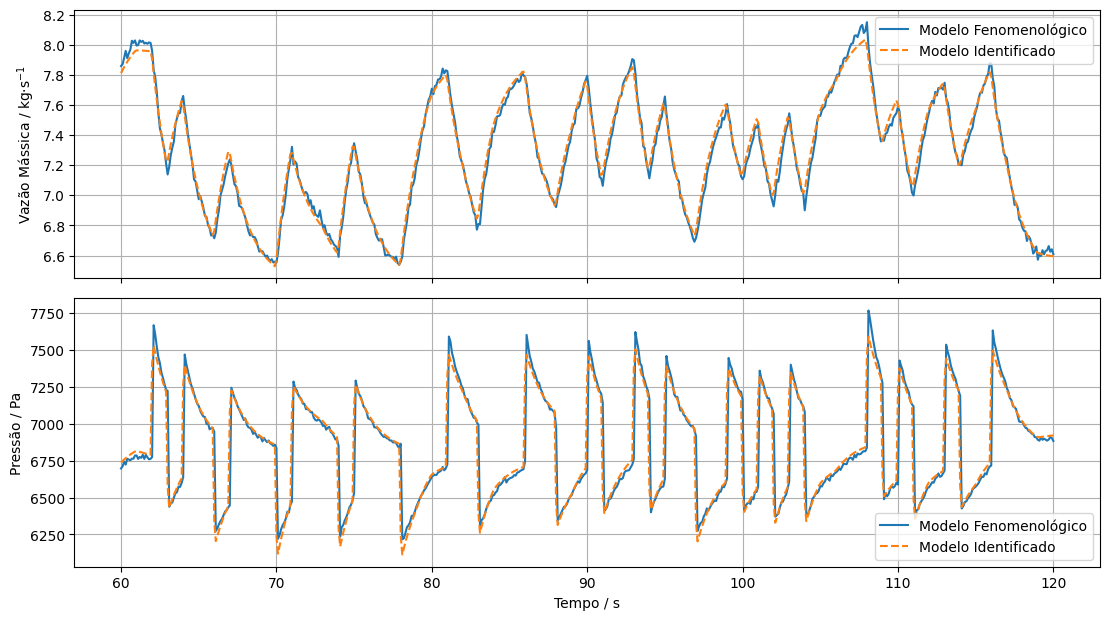

In [4]:
# Gráficos
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(16 * 0.7, 9 * 0.7))

axs[0].plot(t, y1_true, label="Modelo Fenomenológico")
axs[0].plot(t, y1, label="Modelo Identificado", linestyle="--")
axs[0].set_ylabel("Vazão Mássica / kg·s$^{-1}$")

axs[1].plot(t, y2_true, label="Modelo Fenomenológico")
axs[1].plot(t, y2, label="Modelo Identificado", linestyle="--")
axs[1].set_ylabel("Pressão / Pa")

for ax in axs:
    ax.grid()
    ax.legend()
axs[-1].set_xlabel("Tempo / s")

plt.tight_layout()
plt.show()
